In [145]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import GradientBoostingRegressor

In [353]:
data = pd.read_csv("vgsales_clean_v2.csv")

In [260]:
# data

In [354]:
data.drop('Name',axis=1, inplace=True)
data.drop('Platform',axis=1, inplace=True)
data.drop('Publisher',axis=1, inplace=True)
data.drop('NA_Sales',axis=1, inplace=True)
data.drop('EU_Sales',axis=1, inplace=True)
data.drop('JP_Sales',axis=1, inplace=True)
data.drop('Other_Sales',axis=1, inplace=True)
# data.drop('Global_Sales',axis=1, inplace=True)
data.drop('Platform Company',axis=1, inplace=True)
data

,Rank,Year,Genre,Global_Sales
0,1,2006.0,Sports,82.74
1,2,1985.0,Platform,40.24
2,3,2008.0,Racing,35.82
3,4,2009.0,Sports,33.00
4,5,1996.0,Role-Playing,31.37
...,...,...,...,...
16543,16596,2002.0,Platform,0.01
16544,16597,2003.0,Shooter,0.01
16545,16598,2008.0,Racing,0.01
16546,16599,2010.0,Puzzle,0.01


In [356]:
data = data.reindex(columns=['Rank','Global_Sales','Year','Genre'])
data

,Rank,Global_Sales,Year,Genre
0,1,82.74,2006.0,Sports
1,2,40.24,1985.0,Platform
2,3,35.82,2008.0,Racing
3,4,33.00,2009.0,Sports
4,5,31.37,1996.0,Role-Playing
...,...,...,...,...
16543,16596,0.01,2002.0,Platform
16544,16597,0.01,2003.0,Shooter
16545,16598,0.01,2008.0,Racing
16546,16599,0.01,2010.0,Puzzle


In [357]:
data.isnull().sum()

Rank            0
Global_Sales    0
Year            0
Genre           0
dtype: int64

In [359]:
# np.sum(data.isnull())
# data
def preprocess_inputs(df):
    df = df.copy()
    
    # # Drop rows with missing target values
    # missing_target_rows = df[df['Rank'].isna()].index
    # df = df.drop(missing_target_rows, axis=0).reset_index(drop=True)
    
    # Fill remaining missing values with column means
    for column in ['Rank','Year']:
        df[column] = df[column].fillna(df[column].mean())
    
    # Split df into X and y
    y = df['Global_Sales']
    X = df.drop('Global_Sales', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    return X_train, X_test, y_train, y_test

In [360]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [361]:
X_train

,Rank,Year,Genre
4555,4558,2003.0,Misc
15854,15901,2008.0,Adventure
14460,14496,1999.0,Action
1170,1172,2008.0,Misc
4880,4883,2013.0,Racing
...,...,...,...
7813,7822,2013.0,Sports
10955,10971,2005.0,Action
5192,5195,2009.0,Misc
12172,12193,2010.0,Adventure


In [362]:

y_train

4555     0.43
15854    0.02
14460    0.03
1170     1.58
4880     0.39
         ... 
7813     0.19
10955    0.09
5192     0.36
12172    0.07
235      4.57
Name: Global_Sales, Length: 11583, dtype: float64

In [363]:

nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('nominal', nominal_transformer, ['Genre'])
], remainder='passthrough')

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

In [364]:
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('nominal',
                                                  Pipeline(memory=None,
                                                           steps=[('onehot',
                                                                   OneHotEncoder(categories='auto',
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='error',
                                                                                 sparse=False))],
                                     

        Rank    Year       Genre
4586    4589  2011.0      Sports
12403  12424  2005.0    Fighting
13402  13429  2009.0   Adventure
16496  16549  2012.0      Action
11882  11903  2009.0        Misc
...      ...     ...         ...
14328  14363  2003.0      Action
5646    5650  2002.0    Fighting
7189    7195  2008.0      Sports
3798    3801  2010.0  Simulation
12395  12416  2009.0   Adventure

[4965 rows x 3 columns]
RMSE: 0.06
 R^2: 0.9984


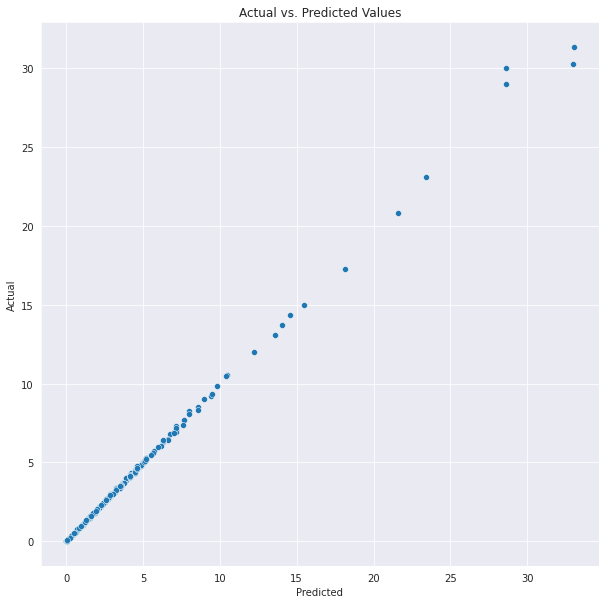

In [377]:
print(X_test)
y_pred = model.predict(X_test)

rmse = np.sqrt(np.mean((y_test - y_pred)**2))
r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2))

print("RMSE: {:.2f}".format(rmse))
print(" R^2: {:.4f}".format(r2))

plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_pred, y=y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Actual vs. Predicted Values")
plt.show()

In [381]:
print(X_test)
new_test_data = {
        'Rank':[2],
        'Year':[2025.0],
        'Genre':['Fighting']

    }
  
# Create DataFrame
new_test_df = pd.DataFrame(new_test_data)
print(new_test_df)

        Rank    Year       Genre
4586    4589  2011.0      Sports
12403  12424  2005.0    Fighting
13402  13429  2009.0   Adventure
16496  16549  2012.0      Action
11882  11903  2009.0        Misc
...      ...     ...         ...
14328  14363  2003.0      Action
5646    5650  2002.0    Fighting
7189    7195  2008.0      Sports
3798    3801  2010.0  Simulation
12395  12416  2009.0   Adventure

[4965 rows x 3 columns]
   Rank    Year     Genre
0     2  2025.0  Fighting


In [382]:
print(new_test_df)
y_pred1 = model.predict(new_test_df)
print(y_pred1)

   Rank    Year     Genre
0     2  2025.0  Fighting
[41.58769206]
